# Problem 19: Application of a Groundwater Flow Model to a Water Supply Problem

In [79]:
#Import and modules/packages that we need to work with
%matplotlib inline
import os
import sys
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import flopy

In [131]:
#Store the values of each parameter into separate variables
inh = 0.0 #initial head
hk = .3*86400 #hydraulic conductivity ft^2/day
ss = 0.06 #storage coefficient
delr = 100 #grid spacing (uniform)
delc = delr
pr = -.963/7.48*86400 #pumping rate ft^3/day
perlen = 1.5 #stress period length in days
nstp = 10 #number of time steps
tsmult = 1.414 #time step multiplier
it_par = 5 # iteration parameters
mxiter = 50 #maximum number of iterations
accel_par = 1.0 #acceleration parameter
hclose = 0.001 #closure criterion (the head change criterion for convergence)
top = 0
botm = -1
nper = 1
laytyp = 0
ipakcb = 50

#grid 44 rows, 55 cols, 1 layer
nlay = 1 #number of layers
nrow = 44 #number of rows
ncol = 55 #number of columns

#riv package
rstage = 0.0 #river stage
rcond = 1728 #river conductance in ft^2/day
rbot = -10 #river bottom

print(pr)

-11123.422459893047


In [132]:
#Flopy objects
modelname = 'p19' #short for problem 19
exe_name = '../MF2005.1_12/bin/mf2005.exe'
model_ws = 'temp'
mf = flopy.modflow.Modflow(modelname, exe_name=exe_name, model_ws = model_ws)

In [133]:
#call in the discretization package
dis = flopy.modflow.ModflowDis(mf, nlay, nrow, ncol, delr=delr, delc=delc,
                               top=top, botm=botm, nper=nper, perlen=perlen, 
                               nstp=nstp, tsmult=tsmult, steady=False)

In [134]:
#call in the basic package
ibound = np.ones((nlay, nrow, ncol))
strt = 0.0
bas = flopy.modflow.ModflowBas(mf, ibound=ibound, strt=strt)

True
****Warning -- two packages of the same type:  <class 'flopy.modflow.mflpf.ModflowLpf'> <class 'flopy.modflow.mflpf.ModflowLpf'>
replacing existing Package...


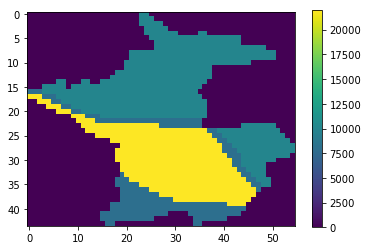

In [388]:
#call in the layer-propery flow (LPF)

fname='..\Data\p19_trans.txt'
print(os.path.isfile(fname))
with open(fname) as f:
    data = f.read().splitlines()
    
f.close()
#print(data)

ibound = []
for s in data:
    for value in s.strip().split(' '):
        ibound.append(int(value))
ibound = np.array(ibound)
ibound = ibound.reshape((44, 55))
plt.imshow(ibound)
hk = np.empty((44, 55), dtype=np.float)
hk[:, :] = ibound[:, :]

hk1 = 10000.
hk2 = 8000.
hk4 = 22000.

hk = np.where(hk==1, hk1, hk)
hk = np.where(hk==2, hk2, hk)
hk = np.where(hk==4, hk4, hk)
plt.imshow(hk)
plt.colorbar()

lpf = flopy.modflow.ModflowLpf(mf, hk=hk, ss=ss, laytyp=laytyp, ipakcb=ipakcb)


In [389]:
#call in the well package (WEL)
# Remember to use zero-based layer, row, column indices!
wel_sp1 = [[0, 27, 31, pr], [0, 27, 31, pr], [0, 28, 34, pr], [0, 30, 31, pr]]
wel_spd = {0: wel_sp1}
wel = flopy.modflow.ModflowWel(mf, stress_period_data=wel_spd)

****Warning -- two packages of the same type:  <class 'flopy.modflow.mfwel.ModflowWel'> <class 'flopy.modflow.mfwel.ModflowWel'>
replacing existing Package...


In [390]:
#call in the preconditioned conjugate-gradient package (PCG) 
pcg = flopy.modflow.ModflowPcg(mf, mxiter=mxiter, hclose=hclose)


****Warning -- two packages of the same type:  <class 'flopy.modflow.mfpcg.ModflowPcg'> <class 'flopy.modflow.mfpcg.ModflowPcg'>
replacing existing Package...


In [391]:
#call in the output control package (OC)
oc = flopy.modflow.ModflowOc(mf, stress_period_data={(0, 0): ['save head', 'print budget', 'save budget']})


****Warning -- two packages of the same type:  <class 'flopy.modflow.mfoc.ModflowOc'> <class 'flopy.modflow.mfoc.ModflowOc'>
replacing existing Package...


In [403]:
#call in the river package (RIV)
#figure out how to change conductance from the package
riv_boundary = pd.read_csv('../Data/problem19_riv.csv')
print(riv_boundary)
lines = [l for l in riv_boundary]
lines[0:][4] = '1728'
#writer = csv.writer(open('/Data/output.csv', 'w'))
#writer.writerows(lines)
#riv = flopy.modflow.ModflowRiv(mf, ipakcb=ipakcb, filename='../Data/problem19_riv.csv')

     1\t18\t1\t0\t0.02\t-10
0    1\t18\t2\t0\t0.02\t-10
1    1\t19\t3\t0\t0.02\t-10
2    1\t19\t4\t0\t0.02\t-10
3    1\t20\t5\t0\t0.02\t-10
4    1\t20\t6\t0\t0.02\t-10
5    1\t20\t7\t0\t0.02\t-10
6    1\t21\t8\t0\t0.02\t-10
7    1\t21\t9\t0\t0.02\t-10
8   1\t22\t10\t0\t0.02\t-10
9   1\t22\t11\t0\t0.02\t-10
10  1\t22\t12\t0\t0.02\t-10
11  1\t23\t13\t0\t0.02\t-10
12  1\t23\t14\t0\t0.02\t-10
13  1\t24\t15\t0\t0.02\t-10
14  1\t24\t16\t0\t0.02\t-10
15  1\t24\t17\t0\t0.02\t-10
16  1\t24\t18\t0\t0.02\t-10
17  1\t25\t19\t0\t0.02\t-10
18  1\t25\t20\t0\t0.02\t-10
19  1\t25\t21\t0\t0.02\t-10
20  1\t25\t22\t0\t0.02\t-10
21  1\t26\t23\t0\t0.02\t-10
22  1\t26\t24\t0\t0.02\t-10
23  1\t27\t25\t0\t0.02\t-10
24  1\t27\t26\t0\t0.02\t-10
25  1\t28\t27\t0\t0.02\t-10
26  1\t28\t28\t0\t0.02\t-10
27  1\t28\t29\t0\t0.02\t-10
28  1\t28\t30\t0\t0.02\t-10
29  1\t28\t31\t0\t0.02\t-10
30  1\t27\t32\t0\t0.02\t-10
31  1\t27\t33\t0\t0.02\t-10
32  1\t27\t34\t0\t0.02\t-10
33  1\t27\t35\t0\t0.02\t-10
34  1\t28\t36\t0\t0.

In [393]:
# Write the MODFLOW model input files
mf.write_input()

# Run the MODFLOW model
success, buff = mf.run_model()

FloPy is using the following executable to run the model: ../MF2005.1_12/bin/mf2005.exe

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: p19.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/07/14 11:24:34

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     2    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     3    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     4    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     5    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     6    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     7    Ground-Water Flow Eqn.
 Solving:  Stress period:     1    Time step:     8    Ground

In [394]:
import flopy.utils.binaryfile as bf

# Create the headfile object
fname = os.path.join(model_ws, 'p19.hds') #"os.path.join" joins together the modelname and the .hds file and stores it in fname
headobj = bf.HeadFile(fname) #create headobj and put values from fname (aka 'p1_pa.hds') inside it
times = headobj.get_times() #assign the headobj values to the variable "times"
print(times) #prints the time at each stress period

#print hydraulic head (Table 14.2)
idx = (0, 28, 31) #(nlay, nrow, ncol) *remember you have to subtract 1 from the original numbers for python - (1, 10, 12)*
ts = headobj.get_ts([idx])
print(ts)

[0.020063508, 0.048433311, 0.088548213, 0.14527068, 0.22547624, 0.33888692, 0.49924961, 0.72600245, 1.046631, 1.4999998]
[[ 0.02006351 -0.06263643]
 [ 0.04843331 -0.13588868]
 [ 0.08854821 -0.20654713]
 [ 0.14527068 -0.2736263 ]
 [ 0.22547624 -0.33853173]
 [ 0.33888692 -0.40287438]
 [ 0.49924961 -0.46820742]
 [ 0.72600245 -0.53606302]
 [ 1.04663098 -0.60813934]
 [ 1.49999976 -0.68668187]]


(0, 0.68668187)

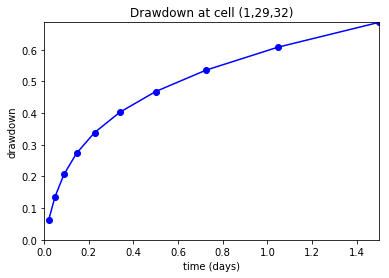

In [395]:
# Plot the drawdown versus time
plt.subplot(1, 1, 1)
ttl = 'Drawdown at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx to that it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (days)') #labels the x-axis
plt.ylabel('drawdown') #labels the y-axis
#here we do "0-ts..." in order to show the drawdown of 
plt.plot(ts[:, 0], 0-ts[:, 1], 'bo-') #(x, y, color/type of line)
plt.xlim(0, ts[:, 0].max())
plt.ylim(0, (0-ts[:, 1]).max())

(-0.68668187, -0.062636428)

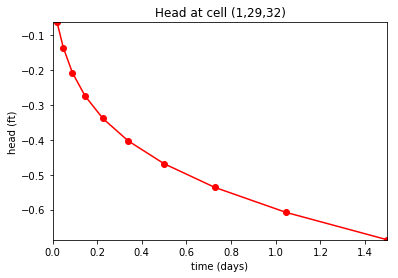

In [396]:
# Plot the head versus time
plt.subplot(1, 1, 1)
ttl = 'Head at cell ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1)
plt.title(ttl)
plt.xlabel('time (days)')
plt.ylabel('head (ft)')
plt.plot(ts[:, 0], ts[:, 1], 'ro-')
plt.xlim(0, ts[:, 0].max())
plt.ylim(ts[:, 1].min(), ts[:, 1].max())

In [397]:
#create different variables for each well so that you can plot them
table2 = pd.read_csv('../Data/table19.2.csv')
print(table2)

well1=table2.ix[0:, ['Time (min)', 'Observation Well 1']]
print(well1)

well2=table2.ix[0:, ['Time (min)', 'Observation Well 2']]
print(well2)

well3=table2.ix[0:, ['Time (min)', 'Observation Well 3']]
print(well3)

   Time (min)  Observation Well 1  Observation Well 2  Observation Well 3
0           1                0.17                0.04                0.00
1           4                0.26                0.12                0.01
2          10                0.33                0.16                0.02
3          40                0.48                0.22                0.08
4         100                0.57                0.29                0.14
5         400                0.79                0.51                0.30
6        1000                0.99                0.70                0.50
7        2000                1.19                0.86                0.68
8        3000                1.33                0.98                0.78
   Time (min)  Observation Well 1
0           1                0.17
1           4                0.26
2          10                0.33
3          40                0.48
4         100                0.57
5         400                0.79
6        1000         

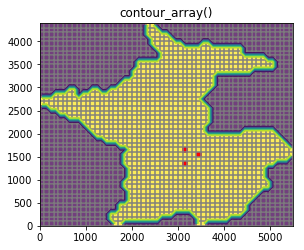

In [398]:
fname = os.path.join(modelname, 'p19.cbc')
head = headobj.get_data(totim=times[-1])
levels = np.linspace(head.min(), head.max(), 10)

fig = plt.figure(figsize=(10, 10))

#plot_array
ax = fig.add_subplot(1, 2, 1, aspect='equal')
ax.set_title('contour_array()')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
quadmesh = modelmap.plot_array(head, masked_values=[999.], alpha=0.5)
modelmap.plot_bc("WEL")
#modelmap.plot_bc("RIV", color='m')
linecollection = modelmap.plot_grid()
contour_set = modelmap.contour_array(head, masked_values=[999.], levels=levels)



### Model Data

In [399]:
# *remember you have to subtract 1 from the original numbers for python*
#well 1 (28, 32)
idx1 = (0, 27, 31) #(nlay, nrow, ncol)

#well 2 (29, 35)
idx2 = (0, 28, 34)

#well 3 (31, 32)
idx3 = (0, 30, 31)

ts = headobj.get_ts([idx1, idx2, idx3])
print(ts)
#prints out time, and the rate of drawdown at well 1, well 2, and well 3

[[ 0.02006351 -0.23208244 -0.11771472 -0.11885044]
 [ 0.04843331 -0.34910825 -0.18232965 -0.18535352]
 [ 0.08854821 -0.42770654 -0.23356573 -0.2383761 ]
 [ 0.14527068 -0.49479392 -0.28446606 -0.29035717]
 [ 0.22547624 -0.55888766 -0.33822227 -0.34406102]
 [ 0.33888692 -0.62301958 -0.39561012 -0.3999376 ]
 [ 0.49924961 -0.68879521 -0.45719621 -0.45847765]
 [ 0.72600245 -0.75748652 -0.52366233 -0.52070653]
 [ 1.04663098 -0.83048254 -0.59589607 -0.58825135]
 [ 1.49999976 -0.90975618 -0.67539471 -0.66349405]]


### Measured Data

In [400]:
well_data=np.array(table2)
print(well_data)

[[  1.00000000e+00   1.70000000e-01   4.00000000e-02   0.00000000e+00]
 [  4.00000000e+00   2.60000000e-01   1.20000000e-01   1.00000000e-02]
 [  1.00000000e+01   3.30000000e-01   1.60000000e-01   2.00000000e-02]
 [  4.00000000e+01   4.80000000e-01   2.20000000e-01   8.00000000e-02]
 [  1.00000000e+02   5.70000000e-01   2.90000000e-01   1.40000000e-01]
 [  4.00000000e+02   7.90000000e-01   5.10000000e-01   3.00000000e-01]
 [  1.00000000e+03   9.90000000e-01   7.00000000e-01   5.00000000e-01]
 [  2.00000000e+03   1.19000000e+00   8.60000000e-01   6.80000000e-01]
 [  3.00000000e+03   1.33000000e+00   9.80000000e-01   7.80000000e-01]]


In [401]:
well_data2=well_data.copy()
well_data2[:, 0]=well_data2[:, 0]/1440
print(well_data2)

[[  6.94444444e-04   1.70000000e-01   4.00000000e-02   0.00000000e+00]
 [  2.77777778e-03   2.60000000e-01   1.20000000e-01   1.00000000e-02]
 [  6.94444444e-03   3.30000000e-01   1.60000000e-01   2.00000000e-02]
 [  2.77777778e-02   4.80000000e-01   2.20000000e-01   8.00000000e-02]
 [  6.94444444e-02   5.70000000e-01   2.90000000e-01   1.40000000e-01]
 [  2.77777778e-01   7.90000000e-01   5.10000000e-01   3.00000000e-01]
 [  6.94444444e-01   9.90000000e-01   7.00000000e-01   5.00000000e-01]
 [  1.38888889e+00   1.19000000e+00   8.60000000e-01   6.80000000e-01]
 [  2.08333333e+00   1.33000000e+00   9.80000000e-01   7.80000000e-01]]


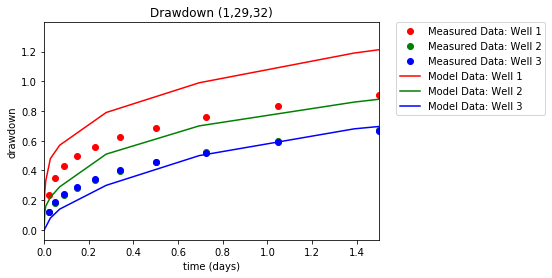

In [402]:
# Plot the drawdown versus time
plt.subplot(1, 1, 1)
ttl = 'Drawdown ({0},{1},{2})'.format(idx[0] + 1, idx[1] + 1, idx[2] + 1) #we are adding 1 to each part of idx to that it prints out the real values and not the code values
plt.title(ttl) #prints/plots title
plt.xlabel('time (days)') #labels the x-axis
plt.ylabel('drawdown') #labels the y-axis
#here we do "0-ts..." in order to show the drawdown of 

plt.plot(ts[:, 0], 0-ts[:, 1], 'ro', label='Measured Data: Well 1') #well 1 measured data
plt.plot(ts[:, 0], 0-ts[:, 2], 'go', label='Measured Data: Well 2') #well 2 measured data
plt.plot(ts[:, 0], 0-ts[:, 3], 'bo', label='Measured Data: Well 3') #well 3 measured data
plt.plot(well_data2[:, 0], well_data2[:, 1], 'r-', label='Model Data: Well 1') #well 1 model data
plt.plot(well_data2[:, 0], well_data2[:, 2], 'g-', label='Model Data: Well 2') #well 2 model data
plt.plot(well_data2[:, 0], well_data2[:, 3], 'b-', label='Model Data: Well 3') #well 3 model data
plt.xlim(0, ts[:, 0].max())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #puts the legend to the right of the plot
#plt.ylim(0, (0-ts[:, 1:]).max())



<a list of 0 text.Text objects>

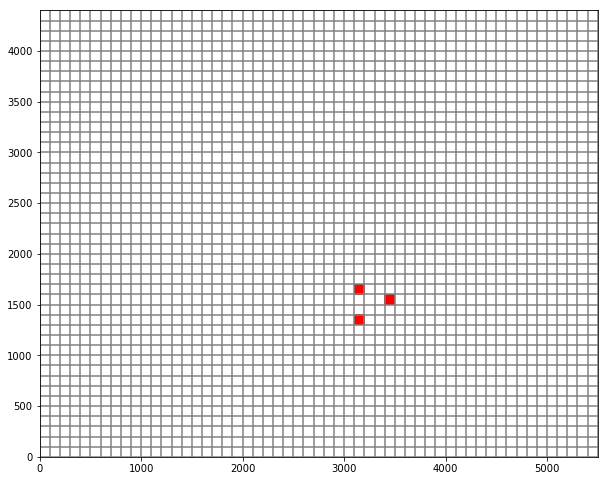

In [357]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
modelmap = flopy.plot.ModelMap(model=mf)
quadmesh = modelmap.plot_ibound()
linecollection = modelmap.plot_grid()
#riv = modelmap.plot_bc('RIV', color='b', plotAll=True)
quadmesh = modelmap.plot_bc('WEL', kper=1, plotAll=True)
contour_set = modelmap.contour_array(head, levels=np.arange(0, 36, 1), colors='g')
plt.clabel(contour_set, inline=1, fontsize=14)

In [107]:
fname = os.path.join(model_ws, 'p19.cbc')
cbb = flopy.utils.CellBudgetFile(fname)
frf = cbb.get_data(text='FLOW RIGHT FACE')
fff = cbb.get_data(text='FLOW FRONT FACE')

rflow = cbb.get_data(text='RIVER LEAKAGE') #create an array/for loop to get out first value of every step
#cbb.list_records()

#create new list
rlist=[]

#create for loop to store only the first value of each time step from riv_flow into riv_list
for riv in rflow:
    rlist.append(riv['q'][0])
    
print(rlist)

Exception: The specified text string is not in the budget file.